<a href="https://colab.research.google.com/github/thongonary/machine_learning_vbscan/blob/master/1_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting
Author: Javier Duarte

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'machine-learning-vbscan/'

Mounted at /content/gdrive


## Plotting in `matplotlib`
Here we do the plotting in `matplotlib` with `uproot`

In [3]:
!pip install uproot

    100% |████████████████████████████████| 122kB 3.8MB/s 
    100% |████████████████████████████████| 81kB 25.1MB/s 


In [0]:
import uproot
import numpy as np
import pandas as pd
import h5py

treename = 'HZZ4LeptonsAnalysisReduced'
filename = {}
upfile = {}
params = {}

filename['bkg'] = base_dir+'data/ntuple_4mu_bkg.root'
filename['VV'] = base_dir+'data/ntuple_4mu_VV.root'

upfile['bkg'] = uproot.open(filename['bkg'])
params['bkg'] = upfile['bkg'][treename].arrays() # dictionary of NumPy arrays
upfile['VV'] = uproot.open(filename['VV'])
params['VV'] = upfile['VV'][treename].arrays() 

In [0]:
df = {}
VARS = ['f_mass4l', 'f_massjj']
df['bkg'] = pd.DataFrame(params['bkg'],columns=VARS)
df['VV'] = pd.DataFrame(params['VV'],columns=VARS)

(0, 2000)

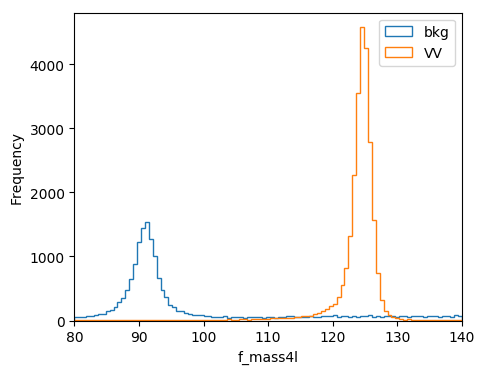

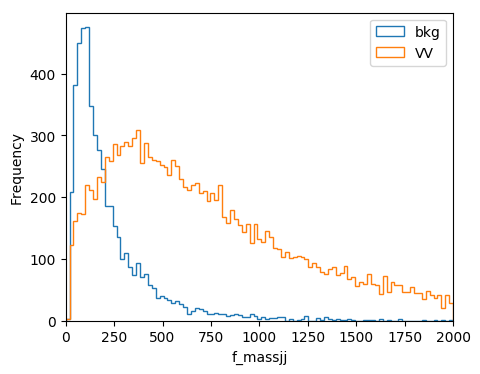

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(80, 140, 100)
df['bkg'][VARS[0]].plot.hist(bins, label='bkg',histtype='step')
df['VV'][VARS[0]].plot.hist(bins, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(80,140)
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[1])
bins = np.linspace(0, 2000, 100)
df['bkg'][VARS[1]].plot.hist(bins, label='bkg',histtype='step')
df['VV'][VARS[1]].plot.hist(bins, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,2000)